# Severity Prediction of Traffic Accidents Using Machine Learning Models

## Preparation

- [Github link](https://github.com/annashen98/machinelearning) 

- Number of words: 1499

- Runtime: 30 minutes (*Memory 10 GB, CPU Intel i7-10700 CPU @2.90GHz*)

- Coding environment: VS Code (or SDS Docker)

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/).

- Additional library :
    - **lightgbm**: A machine learning model based on Gradient Boosting Decision Tree (GBDT)
    - **catboost**: An open-source machine learning library based on gradient boosting algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Table of contents

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)

## 1 Introduction

[[ go back to the top ]](#Table-of-contents)

Traffic accidents are a significant global concern, ranking among the leading causes of injuries and fatalities (Chand et al., 2021). According to a WHO report, approximately 1.35 million people die annually, and 20 to 50 million people suffer nonfatal injuries as a result of traffic accidents (WHO, 2020). By 2030, traffic accidents are projected to become the fifth leading cause of death worldwide (Sameen et al., 2017). As a result, research on traffic accidents has become a critical and growing area of study. Due to the uncertainty and randomness inherent in traffic accidents, predicting potential traffic events and analyzing the causes of accidents have become key research topics. Researchers are continuously exploring methods to simulate data, which is crucial for understanding the severity of the problem and accelerating decision-making to mitigate its impact (Ogwueleka et al., 2014). 

Various analytical methods are employed to study road traffic data, such as linear regression, machine learning, and artificial neural networks. Among these, machine learning (ML) techniques are widely used for predicting road traffic accidents. ML methods can handle multidimensional data and execute tasks flexibly using encoding. Predefined conditions or features can be employed to predict and model traffic accident fatalities (Lord et al., 2010).

This study applies machine learning techniques to predict the severity of traffic accidents in the UK, focusing on identifying key influencing factors. The research aims to explore how different models can effectively predict accident severity and provide insights for improving traffic safety.

## 2 Research questions

[[ go back to the top ]](#Table-of-contents)

1. What factors have a significant impact on the severity of traffic accidents? What is its relative importance?
2. How do different machine learning models compare in predicting the severity of traffic accidents?

## 3 Data

[[ go back to the top ]](#Table-of-contents)

The data utilized in this study originates from the 2023 Road Safety Data provided by the UK government. It consists of two datasets: the Collision Data and the Vehicle Data.
1.	Collision Data: This dataset provides detailed information on road traffic accidents in the UK that resulted in personal injury. 
2.	Vehicle Data: This dataset includes details of vehicles involved in the recorded accidents. 

### 3.1 Import and clean data
Import the accident data and vehicle data together. According to the Road Safety Open Data Guide-2024, the values "-1" and "99" represent missing or out-of-range data and unknown values, respectively. It is imperative to preprocess the records containing these values before merge them together to ensure data quality and analytical reliability.

For numerical indicators, missing values were imputed using the mean of the respective variable. For categorical indicators, records containing missing values were removed to maintain the integrity of the dataset.

In [2]:
# set the url of files
url_collision = "https://raw.githubusercontent.com/annashen98/machinelearning/refs/heads/main/dft-road-casualty-statistics-collision-2023.csv"
url_vehicle = "https://raw.githubusercontent.com/annashen98/machinelearning/refs/heads/main/dft-road-casualty-statistics-vehicle-2023.csv"

# import data
collision_data = pd.read_csv(url_collision)
vehicle_data = pd.read_csv(url_vehicle)

# print columns in collision_data 
print("Column names in collision_data:")
print(collision_data.columns.tolist())

# print columns in vehicle_data 
print("Column names in vehicle_data:")
print(vehicle_data.columns.tolist())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19828\53274732.py:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_data = pd.read_csv(url_collision)


Column names in collision_data:
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'enhanced_severity_collision']
Column names in vehicle_data:
['accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towin

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19828\53274732.py:7: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_data = pd.read_csv(url_vehicle)


In [3]:
# data cleaning
#delete some columns that are not relevent to research design or some columns that exist in both two dataset
collision_data = collision_data.drop(columns=['accident_index', 'accident_year','location_easting_osgr', 'location_northing_osgr',
                                              'longitude', 'latitude', 'police_force', 'date', 'local_authority_district', 
                                              'local_authority_ons_district', 'local_authority_highway', 'first_road_number',
                                              'second_road_number','lsoa_of_accident_location'])
vehicle_data = vehicle_data.drop(columns=['accident_index', 'accident_year','vehicle_reference', 'generic_make_model',
                                          'driver_home_area_type', 'lsoa_of_driver','dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n'])

In [4]:
# deal with missing data
# seperate collision index into two parts
collision_categorical_columns = ['accident_reference','day_of_week', 'time', 'first_road_class', 'road_type','speed_limit', 'junction_detail', 
                       'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
                       'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 
                       'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
                       'trunk_road_flag', 'enhanced_severity_collision', 'accident_severity']  
collision_numerical_columns = ['number_of_vehicles','number_of_casualties']      



# delete records that include -1 or 99 in categorical columns
for col in collision_categorical_columns:
    collision_data = collision_data[(collision_data[col] != -1) & (collision_data[col] != 99)]

# use average value to repace -1 or 99 in numerical columns
for col in collision_numerical_columns:
    mean_value = collision_data[collision_data[col] != -1][collision_data[col] != 99][col].mean()
    collision_data[col] = collision_data[col].replace([-1, 99], mean_value)

In [5]:
# seperate vehicle index into two parts
vehicle_categorical_columns = ['accident_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 
                               'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 
                               'skidding_and_overturning','hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                               'first_point_of_impact', 'vehicle_left_hand_drive','journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
                               'propulsion_code', 'escooter_flag', 'driver_distance_banding', 'driver_imd_decile']
vehicle_numerical_columns = ['age_of_driver', 'engine_capacity_cc','age_of_vehicle']

# delete records that include -1 or 99 in categorical columns
for col in vehicle_categorical_columns:
    vehicle_data = vehicle_data[(vehicle_data[col] != -1) & (vehicle_data[col] != 99)]

# use average value to repace -1 or 99 in numerical columns
for col in vehicle_numerical_columns:
    mean_value = vehicle_data[vehicle_data[col] != -1][vehicle_data[col] != 99][col].mean()
    vehicle_data[col] = vehicle_data[col].replace([-1, 99], mean_value)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19828\3035433883.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_value = vehicle_data[vehicle_data[col] != -1][vehicle_data[col] != 99][col].mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19828\3035433883.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_value = vehicle_data[vehicle_data[col] != -1][vehicle_data[col] != 99][col].mean()


### 3.2 Merge data
Merge two dataset by 'accident_reference' values. A left join is performed with the vehicle data as the left table and the collision data as the right table.

In [6]:
common_references = set(vehicle_data['accident_reference']).intersection(collision_data['accident_reference'])

# filter records that exists in both vehicle_data and collision_data 
filtered_vehicle_data = vehicle_data[vehicle_data['accident_reference'].isin(common_references)]
filtered_collision_data = collision_data[collision_data['accident_reference'].isin(common_references)]

# merge data
merged_data = pd.merge(
    filtered_vehicle_data,
    filtered_collision_data,
    on='accident_reference',
    how='left'
)

# print data
print(f"Merged data shape: {merged_data.shape}")
print(merged_data.columns.tolist())

Merged data shape: (22882, 46)
['accident_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'driver_imd_decile', 'escooter_flag', 'driver_distance_banding', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'time', 'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazard

The final data has 22882 records and 46 columns. The table below shows the details of each column.


| Variable                            | Type         | Description                                                             |Notes   |
|-------------------------------------|--------------|-------------------------------------------------------------------------|---|
| accident_reference                | Categorical  | In year id used by the police to reference a collision  |   |
| vehicle_type                      | Categorical  | Type of the vehicle involved in the accident (e.g., car, truck, motorcycle) |   |
| towing_and_articulation           | Categorical  | Indicates if the vehicle was towing or articulated   |   |
| vehicle_manoeuvre                 | Categorical  | Specific actions of the vehicle during an accident                        |   |
| vehicle_direction_from            | Categorical  | Direction the vehicle came from before the accident                            |   |
| vehicle_direction_to              | Categorical  | Direction the vehicle was heading to before the accident                          |   |
| vehicle_location_restricted_lane  | Categorical  | Indicates if the vehicle was in a restricted lane                                 |   |
| junction_location                 | Categorical  | Position of the vehicle relative to a junction at the time of the accident                               |   |
| skidding_and_overturning          | Categorical  | Indicates if the vehicle skidded or overturned                            |   |
| hit_object_in_carriageway         | Categorical  | Object struck by the vehicle within the carriageway (e.g., another vehicle, debris)                      |   |
| vehicle_leaving_carriageway       | Categorical  | Indicates if the vehicle left the carriageway and under what circumstances                   |   |
| hit_object_off_carriageway     | Categorical  | Object struck by the vehicle outside the carriageway                       |   |
| first_point_of_impact          | Categorical  | Initial point of impact on the vehicle during the accident                    |   |
| vehicle_left_hand_drive        | Categorical  | Indicates whether the vehicle was left-hand drive                        |   |
| journey_purpose_of_driver      | Categorical  | Purpose of the journey undertaken by the driver                        |   |
| sex_of_driver                  | Categorical  | Gender of the driver                   |'1'=Male, '2'=Female, '3'=Not know   |
| age_of_driver                  | Numeric      | Exact age of the driver at the time of the accident                        |   |
| age_band_of_driver             | Categorical  | Age group of the driver (e.g., 0-5 years)                      |   |
| engine_capacity_cc             | Numeric      | Engine capacity of the vehicle in cubic centimeters                        |   |
| propulsion_code                | Categorical  | Propulsion type of the vehicle (e.g., petrol, diesel, electric)                          |   |
| age_of_vehicle                 | Numeric      | Age of the vehicle at the time of the accident                          |   |
| driver_imd_decile              | Categorical  | Index of Multiple Deprivation (IMD) decile of the driver’s residence                        |   |
| escooter_flag                  | Categorical  | Indicates whether an e-scooter was involved                         |   |
| driver_distance_banding        | Categorical  | Estimated distance traveled by the driver before the accident                        |   |
| number_of_vehicles             | Numeric      | Total number of vehicles involved in the accident                      |   |
| number_of_casualties           | Numeric      | Total number of casualties resulting from the accident                         |   |
| day_of_week                    | Categorical  | Day of the week on which the accident occurred                      |   |
| time                           | Categorical  | Time of day when the accident occurred                          |   |
| first_road_class               | Categorical  | Classification of the first road involved (e.g., A, B, C)                   |   |
| road_type                      | Categorical  | Type of road where the accident occurred                    |   |
| speed_limit                    | Categorical  | Speed limit in place at the location of the accident                          |   |
| junction_detail                | Categorical  | Detailed description of the junction type       |e.g., Not at junction or within 20 metres, Roundabout  |
| junction_control               | Categorical  | Type of control at the junction (e.g., stop sign)                        |   |
| second_road_class              | Categorical  | Classification of the second road involved                           |   |
| pedestrian_crossing_human_control | Categorical  | Indicates if a pedestrian crossing was human-controlled                      |   |
| pedestrian_crossing_physical_facilities | Categorical  | Indicates the presence of physical pedestrian crossing facilities                            |   |
| light_conditions                | Categorical  | Lighting conditions at the time of the accident                      |   |
| weather_conditions              | Categorical  | Weather conditions at the time of the accident(e.g., frog)                          |   |
| road_surface_conditions         | Categorical  | Surface condition of the road(e.g., dry)                          |   |
| special_conditions_at_site      | Categorical  | Any special conditions present at the accident site (e.g., roadworks)               |   |
| carriageway_hazards             | Categorical  | Hazards present on the carriageway (e.g., dog on road)                    |   |
| urban_or_rural_area             | Categorical  | Classification of the area as urban or rural    | '1'=Urban, '2'=Rural, '3'=Unallocated  |
| did_police_officer_attend_scene_of_accident  | Categorical  | Indicates if a police officer attended the accident scene                                 |   |
| trunk_road_flag                 | Categorical  | Indicates whether the accident occurred on a trunk road                   |   |
| enhanced_severity_collision     | Categorical  | Enhanced classification of collision severity   |'1'=Fatal, '5'=Very Serious, '6'=Moderately Serious, '7'=Less Serious, '3'=Slight   |
| accident_severity               | Categorical  | Severity of the accident     |'1'=Fatal, '2'=Serious, '3'=Slight   |

Among these indicators, the dependent variable is selected as ‘enhanced_severity_collision’, which provides a more detailed classification of accident severity, while ‘accident_severity’ is excluded. The remaining indicators are used as independent variables. ‘Time’ is re-coded into daytime (1) and nighttime (0) for easier analysis. Redundant variables, such as 'age_of_driver' and 'age_band_of_driver', or 'junction_detail' and 'junction_location', are simplified, retaining only 'age_band_of_driver' and 'junction_detail'.

The final dataset contains 42 columns and 22882 records.

In [7]:
# delete columns
merged_data = merged_data.drop(columns=['accident_severity', 'accident_reference','age_of_driver', 'junction_location'])

# change time 
def time_to_day_night(time_str):
    hour = int(time_str.split(':')[0])
    # 1=day, 0=night
    return 1 if 6 <= hour < 18 else 0

# apply function
merged_data['day_night'] = merged_data['time'].apply(time_to_day_night)

# delete time 
merged_data = merged_data.drop(columns=['time'])

# check result
print(merged_data.shape)

(22882, 42)


## 4 Methodology

[[ go back to the top ]](#Table-of-contents)

In this study, the dataset contains numerous independent variables, which may lead to model overfitting and increased computational complexity. The presence of some irrelevant or less important features may negatively impact the accuracy and interpretability of the model's predictions. To address this, feature selection is performed to identify the most important predictors for subsequent analysis. Random Forest is chosen for this task due to its ability to evaluate feature importance effectively. By leveraging the inherent feature importance scores provided by Random Forest, we can systematically identify the most relevant variables.

After selecting features, I will use four different classification algorithms to predict the severity of accidents. These models were chosen based on their ability to process categorical and numerical data, robustness to noise, and adaptability to non-linear patterns.

1. Random Forest is an ensemble of tree-based classifiers (Breiman, 2001). Each tree contributes a vote, classifying inputs based on the most likely class label. This method is efficient, noise-resistant, and effective at detecting non-linear patterns in data. It can handle both numerical and categorical variables (Titapiccolo et al., 2013).
2. LightGBM, developed by Microsoft Research, is a gradient boosting framework optimized for efficiency and scalability (Ke et al., 2017). Its histogram-based learning reduces memory usage and training time, making it ideal for large datasets with mixed variable types.
3. CatBoost is a GBDT algorithm designed to handle categorical features directly during training (Prokhorenkova et al., 2018). This approach minimizes information loss during encoding, ensuring stability and strong performance across various tasks.
4. XGBoost is widely used for regression and classification tasks (Asselman et al., 2023). Its regularization techniques help prevent overfitting, and its ability to manage imbalanced datasets makes it a robust choice for classification problems.

Together, these models provide a diverse methods for exploring the dataset comprehensively, ensuring that the analysis captures both linear and non-linear relationships effectively.The flow chart below shows the work flow of this study.

![work_flow.png](work_flow.png)

## 5 Results and discussion

[[ go back to the top ]](#Table-of-contents)

### 5.1 Feature selection
Random Forests is employed as a feature selection method to identify the most significant variables, thereby reducing dimensionality and improving model performance.

Top Features:
                   Feature  Importance
15      engine_capacity_cc    0.085242
17          age_of_vehicle    0.075033
18       driver_imd_decile    0.057854
23             day_of_week    0.053802
14      age_band_of_driver    0.053526
4     vehicle_direction_to    0.050991
3   vehicle_direction_from    0.048983
2        vehicle_manoeuvre    0.039940
27         junction_detail    0.036756
10   first_point_of_impact    0.031375


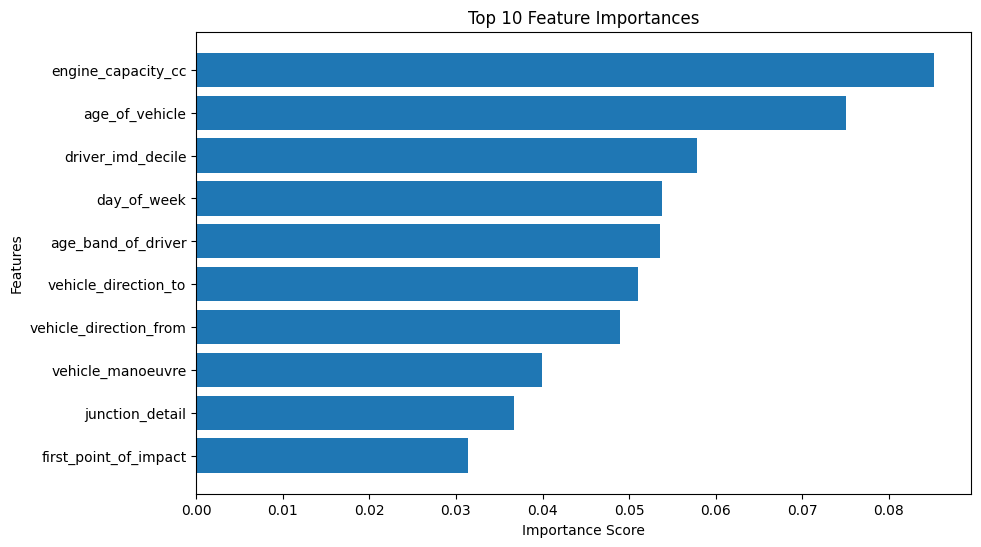

In [8]:
# set X and Y
X = merged_data.drop(columns=['enhanced_severity_collision'])  
y = merged_data['enhanced_severity_collision']  

# set train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# calculate importance of features
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# print
print("Top Features:")
print(feature_importances.head(10))

# visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()


The feature extraction process using Random Forest identified the following ten most important features based on their contribution to predicting the target variable(enhanced_severity_collision): engine_capacity_cc, age_of_vehicle, driver_imd_decile, day_of_week, age_band_of_driver, vehicle_direction_to, vehicle_direction_from, vehicle_manoeuvre, junction_detail, first_point_of_impact. 

engine_capacity_cc and age_of_vehicle are the most significant, suggesting that vehicle characteristics play a crucial role in predicting accident severity. Variables like driver_imd_decile and age_band_of_driver indicate the importance of socioeconomic and demographic factors. The day_of_week is a temporal feature, potentially reflecting varying traffic patterns on different days. Features related to vehicle direction (vehicle_direction_from and vehicle_direction_to), maneuvers and the first point of impact provide critical insights into the dynamics of accidents.

### 5.2 Severity prediction
According to 10 selected independent variables, update training and testing dataset to reduce dimensionality. Then, use random forest, CatBoost, LightGBM and XGBoost to predict severity.

In [9]:
# select 10 features
selected_features = ['engine_capacity_cc', 'age_of_vehicle', 'driver_imd_decile', 
                     'day_of_week', 'age_band_of_driver', 'vehicle_direction_from', 
                     'vehicle_direction_to', 'vehicle_manoeuvre', 'junction_detail', 
                     'first_point_of_impact']

# update X_train and X_test based on 10 features
X_train = X_train[selected_features]  
X_test = X_test[selected_features] 

In [10]:
# define variables
columns_to_normalize = ['engine_capacity_cc', 'age_of_vehicle']

scaler = MinMaxScaler()

# Normalize the training and testing sets separately to prevent data leakage
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

X_test = X_test[X_train.columns]

In [11]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42, verbose=-1)
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# List of models for looping
models = {'Random Forest': rf_model, 'LightGBM': lgb_model, 'CatBoost': catboost_model}

# cross validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  
    print(f'{name} Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}')

    # train model
    model.fit(X_train, y_train)

    # evaluate modle
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {test_accuracy:.4f}\n')

Random Forest Cross-Validation Mean Accuracy: 0.7421
Random Forest Test Accuracy: 0.7439

LightGBM Cross-Validation Mean Accuracy: 0.7426
LightGBM Test Accuracy: 0.7461

CatBoost Cross-Validation Mean Accuracy: 0.7409
CatBoost Test Accuracy: 0.7448



In [12]:
import copy
X_train_xgb = copy.deepcopy(X_train)
X_test_xgb = copy.deepcopy(X_test)
y_train_xgb = copy.deepcopy(y_train)
y_test_xgb = copy.deepcopy(y_test)

# Remap the target variable to start from 0 and be a continuous integer
y_unique_classes = sorted(y_train.unique())  
class_mapping = {old: new for new, old in enumerate(y_unique_classes)}
y_train_xgb = y_train_xgb.map(class_mapping)
y_test_xgb = y_test_xgb.map(class_mapping)

# Encoding categorical variables
categorical_columns = [col for col in X_train_xgb.columns if col not in ['engine_capacity_cc', 'age_of_vehicle']]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])
    X_test_xgb[col] = le.transform(X_test_xgb[col])
    label_encoders[col] = le

# initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# cross validation
cv_scores = cross_val_score(xgb_model, X_train_xgb, y_train_xgb, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")

# train model
xgb_model.fit(X_train_xgb, y_train_xgb)

# test model
y_pred_xgb = xgb_model.predict(X_test_xgb)
test_accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")

c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:48:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:48:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:48:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python312\Lib\sit

XGBoost Cross-Validation Mean Accuracy: 0.7365


c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:48:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.7404


In [13]:
# Set the parameters to be adjusted
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# use GridSearchCV to adjust
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_xgb, y_train_xgb)

# print the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# train model
best_xgb_model = grid_search.best_estimator_

# assess the model
y_pred = best_xgb_model.predict(X_test_xgb)
test_accuracy = accuracy_score(y_test_xgb, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:16:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.7462
Test Accuracy: 0.7485


In [14]:
# Calculate precision, recall and F1 score for each model.
# Metrics storage
metrics = {}

# Generate predictions and calculate metrics for Random Forest, LightGBM, and CatBoost
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    metrics[name] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Handle XGBoost separately due to different data
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Calculate precision, recall, and F1 score for XGBoost
precision_xgb = precision_score(y_test_xgb, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_xgb, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_xgb, y_pred_xgb, average='weighted')

# Store XGBoost results
metrics['XGBoost'] = {'Precision': precision_xgb, 'Recall': recall_xgb, 'F1 Score': f1_xgb}

# Print XGBoost metrics
print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}\n")

Random Forest Metrics:
Precision: 0.6071
Recall: 0.7439
F1 Score: 0.6431

LightGBM Metrics:
Precision: 0.5907
Recall: 0.7461
F1 Score: 0.6424

CatBoost Metrics:
Precision: 0.6223
Recall: 0.7448
F1 Score: 0.6459

XGBoost Metrics:
Precision: 0.5905
Recall: 0.7404
F1 Score: 0.6435



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The prediction accuracy of four models are shown in the table below:

| Model            | Accuracy     | Precision    | Recall   | F1 Score |
|------------------|--------------|--------------|----------|----------|
| Random Forest    | 0.7439       | 0.6071       | 0.7439   | 0.6431   |
| LightGBM         | 0.7461       | 0.5907       | 0.7461   | 0.6424   |
| CatBoost         | 0.7448       | 0.6223       | 0.7448   | 0.6459   |
| XGBoost          | 0.7485       | 0.5905       | 0.7404   | 0.6435   |

### 5.3 Model comparison
In this part, I use confusion matrix to show the performance of each model.

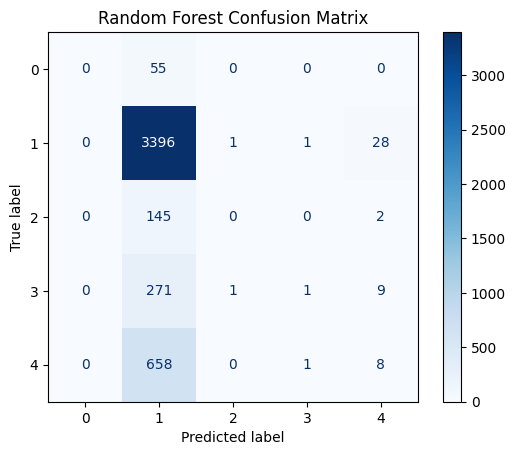

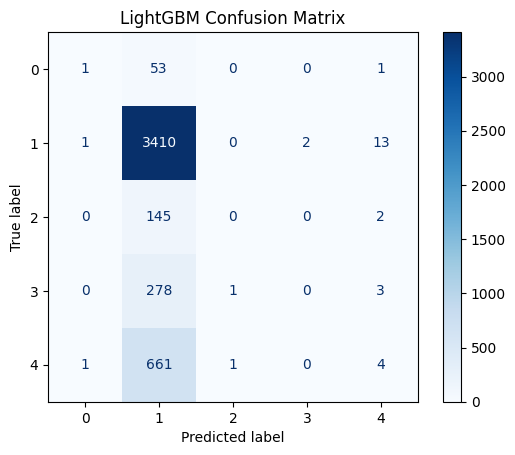

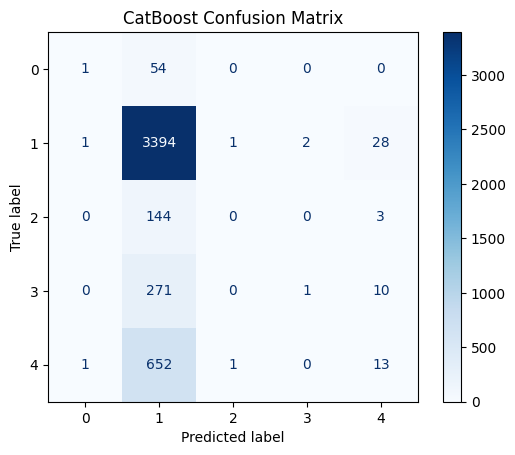

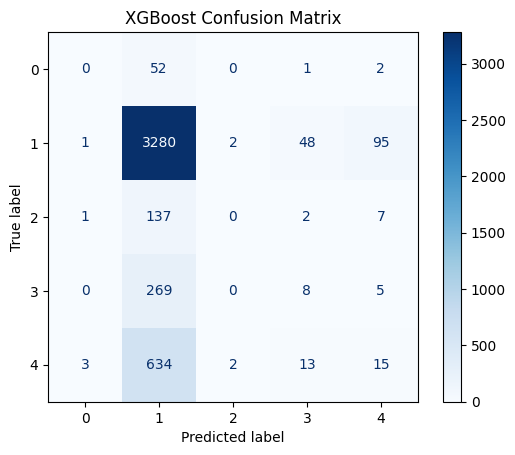

In [15]:
# Generate predictions for Random Forest, LightGBM, and CatBoost
rf_predictions = rf_model.predict(X_test)  # Random Forest predictions
lgb_predictions = lgb_model.predict(X_test)  # LightGBM predictions
catboost_predictions = catboost_model.predict(X_test)  # CatBoost predictions
xgboost_predictions = xgb_model.predict(X_test) #XGBoost predictions

# Generate confusion matrix for each model
rf_cm = confusion_matrix(y_test, rf_predictions)
lgb_cm = confusion_matrix(y_test, lgb_predictions)
catboost_cm = confusion_matrix(y_test, catboost_predictions)
xgboost_cm = confusion_matrix(y_test_xgb, xgboost_predictions)

# Display confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Display confusion matrix for LightGBM
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=lgb_cm)
disp_lgb.plot(cmap='Blues')
plt.title("LightGBM Confusion Matrix")
plt.show()

# Display confusion matrix for CatBoost
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=catboost_cm)
disp_catboost.plot(cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.show()

# Display confusion matrix for XGBoost
disp_xgboost = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm)
disp_xgboost.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

After hyperparameter tuning, the results demonstrate that all four models achieve comparable performance, with XGBoost slightly outperforming others in terms of accuracy (0.7485). CatBoost maintains the best precision (0.6223) and F1-score (0.6459), reinforcing its robustness in minimizing false positives. Recall remains stable (~0.74), confirming consistent sensitivity. The minimal performance gaps suggest model selection could prioritize computational efficiency (e.g., LightGBM) or slight metric advantages (CatBoost). 

## 6 Conclusion

[[ go back to the top ]](#Table-of-contents)

This study explored traffic accident severity prediction using machine learning. After cleaning the dataset, feature selection via Random Forest identified ten key predictors, including vehicle characteristics (e.g., engine_capacity_cc and age_of_vehicle), socioeconomic factors (e.g., driver_imd_decile), and accident dynamics (e.g., vehicle_direction_from). These features highlight the complexity of factors influencing accident severity.

Four models(Random Forest, LightGBM, CatBoost, and XGBoost) were evaluated. CatBoost achieves the best balance (highest F1-score: 0.6459), while XGBoost leads in accuracy (0.7485), but overall differences remain small. 

Key limitations include the reliance on Random Forest for feature selection, which may not fully eliminate irrelevant variables, and the exclusion of environmental and infrastructure-related factors, which could enhance predictions. Additionally, categorical encoding might have caused minor information loss. Future work could incorporate additional features and alternative methods to improve model performance and interpretability.

## References

[[ go back to the top ]](#Table-of-contents)

Asselman, A., Khaldi, M. and Aammou, S., 2023. Enhancing the prediction of student performance based on the machine learning XGBoost algorithm. Interactive Learning Environments, 31(6), pp.3360-3379.

Breiman, L., 2001. Random forests. Machine learning, 45, pp.5-32.

Chand, A., Jayesh, S. and Bhasi, A.B., 2021. Road traffic accidents: An overview of data sources, analysis techniques and contributing factors. Materials Today: Proceedings, 47, pp.5135-5141.

G.L. Ke, Q. Meng, T. Finley, T. F. Wang, W. Chen, W.D. Ma, et al., "LightGBM: A Highly Efficient Gradient Boosting Decision Tree", Advances in Neural Information Processing Systems, pp. 3149-3157, 2017.

Lord, D. and Mannering, F., 2010. The statistical analysis of crash-frequency data: A review and assessment of methodological alternatives. Transportation research part A: policy and practice, 44(5), pp.291-305.

Ogwueleka, F.N., Misra, S., Ogwueleka, T.C. and Fernandez-Sanz, L., 2014. An artificial neural network model for road accident prediction: a case study of a developing country. Acta Polytechnica Hungarica, 11(5), pp.177-197.

Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A.V. and Gulin, A., 2018. CatBoost: unbiased boosting with categorical features. Advances in neural information processing systems, 31.

Sameen, M.I. and Pradhan, B., 2017. Assessment of the effects of expressway geometric design features on the frequency of accident crash rates using high-resolution laser scanning data and GIS. Geomatics, Natural Hazards and Risk, 8(2), pp.733-747.

Titapiccolo, J.I., Ferrario, M., Cerutti, S., Barbieri, C., Mari, F., Gatti, E. and Signorini, M.G., 2013. Artificial intelligence models to stratify cardiovascular risk in incident hemodialysis patients. Expert systems with applications, 40(11), pp.4679-4686.

World Health Organization, Road traffic injuries, News-Room/Fact-Sheets/Detail/Road-Traffic-Injuries. (2020). https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries (accessed August 14, 2020).
